In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import ZZFeatureMap # this is the featuremap described in the paper
#from quiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data # this is the data generated in the paper

from sklearn.svm import SVC # this will be used to classical cclassification after the data has been mapped into the feature space

import matplotlib.pyplot as plt

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
d = 2 # dimension of the data - given in the paper

# split the data into train-test
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=15,
    test_size=10,
    n=d,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

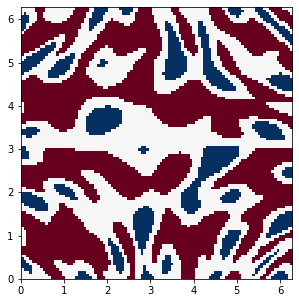

In [3]:
# plot the data distribution - clearly highly complex class distributions
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

In [4]:
# calculate the feature map
feature_map = ZZFeatureMap(d, reps=2, entanglement='linear')
backend = Aer.get_backend('qasm_simulator', shots=1024)

# calculate the kernel 
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

In [5]:
svc = SVC(kernel=kernel.evaluate) # call scikit-learn's support vector classifier with our custom kernel
svc.fit(train_features, train_labels) # train the SVC
score = svc.score(test_features, test_labels) # calculate perrformance of the model

print('Test Score:', score)

Test Score: 1.0
